<a href="https://colab.research.google.com/github/Esheshwari/python-programming/blob/main/CIE_3PPDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIE - 3 COMPONENT**
- PRESENTED BY (TEAM-1)

1. Esheshwari Kumari [1RUA24BCA0025]

2. Amrithaa M [1RUA24BCA0010]


# **Mapping the dropout crisis: A Comprehensive Analysis of School dropouts in India (2012-2015)**

**PROJECT OVERVIEW**

1. Analyze dropout rates across Indian states (2012–2015).
2. Explore differences by gender, region, year, and education level.
3. Identify states requiring urgent intervention.
4. Trend Analysis- to analyse trend over time.
5. Dropout distribution by education level.
6. To Analyze total dropout rates across categories.
7. Regional Analysis -to visualize the distribution of dropout rates across different region.


**DATASET DESCRIPTION**

  Source: Dropout ratio data from Indian education ministry

  Covers: 35 States/UTs | 4 Academic Years (2012–2015)

  Levels: Primary, Upper Primary, Secondary, Hr. Secondary

  Split by: Boys, Girls, Total

**OBJECTIVES**

🔹 Gender Disparity: Analyze dropout differences between boys & girls.

🔹 Trend Analysis: The dropout rates for boys and girls over the years.

🔹 Dropout Distribution: To Analyze dropout distribution by education level.

🔹 Regional Analysis:  visualize the distribution of dropout rates across different region.

🔹 Urgency Analysis: Identify states & levels needing immediate policy focus.

# **PROJECT SETUP**

**LOADING THE REQUIRED LIBRARIES**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set style
plt.style.use("seaborn-v0_8")
sns.set_palette('viridis')
%matplotlib inline

**LOADING AND CLEANING THE DATA-INITIAL EXPLORATIONS**

In [4]:
import pandas as pd
import numpy as np
from google.colab import files

# Step 1: Upload and load the dataset
uploaded = files.upload()
df = pd.read_csv('dropout-ratio-2012-2015.csv')

# Step 2: Clean column names (remove whitespace, replace spaces with underscores)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Step 3: Clean the 'State_UT' column
# - Remove leading/trailing spaces
# - Replace multiple internal spaces with one
# - Convert to title case for consistency
df['State_UT'] = df['State_UT'].str.strip().str.replace(r'\s+', ' ', regex=True).str.title()

# Step 4: Convert 'year' to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Step 5: Replace invalid or non-numeric values with NaN and convert to float
# Identify all columns except 'State_UT' and 'year'
cols_to_convert = df.columns.drop(['State_UT', 'year'])

# Clean each column
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].replace({'NR': np.nan, 'Uppe_r_Primary': np.nan}), errors='coerce')

# Step 6: Drop duplicates based on 'State_UT' and 'year'
df = df.drop_duplicates(subset=['State_UT', 'year'])

# ✅ Final Preview
print("\n✅ Cleaned Data (First 5 Rows):\n")
print(df.head())

# Optional: Check data types
print("\n🔍 Data Types After Cleaning:\n")
print(df.dtypes)

# Optional: Check for remaining duplicate state entries
print("\n📌 Check for Duplicate States:\n")
print(df['State_UT'].value_counts())


Saving dropout-ratio-2012-2015.csv to dropout-ratio-2012-2015.csv

✅ Cleaned Data (First 5 Rows):

             State_UT  year  Primary_Boys  Primary_Girls  Primary_Total  \
0       A & N Islands   NaN          0.83           0.51           0.68   
3      Andhra Pradesh   NaN          3.30           3.05           3.18   
6   Arunachal Pradesh   NaN         11.54          10.22          10.89   
9               Assam   NaN          7.02           5.46           6.24   
12              Bihar   NaN           NaN            NaN            NaN   

    Upper_Primary_Boys  Upper_Primary_Girls  Upper_Primary_Total  \
0                  NaN                 1.09                 1.23   
3                 3.21                 3.51                 3.36   
6                 4.44                 6.74                 5.59   
9                 7.89                 6.55                 7.20   
12                 NaN                  NaN                  NaN   

    Secondary__Boys  Secondary__Girls  Se

# **GENDER DISPARITY**

**PROBLEM STATEMENT:** To Analyze Gender Disparity in School Dropout Rates

**PURPOSE:** Visualize average dropout by gender across states.
- Horizontal Bar Chart

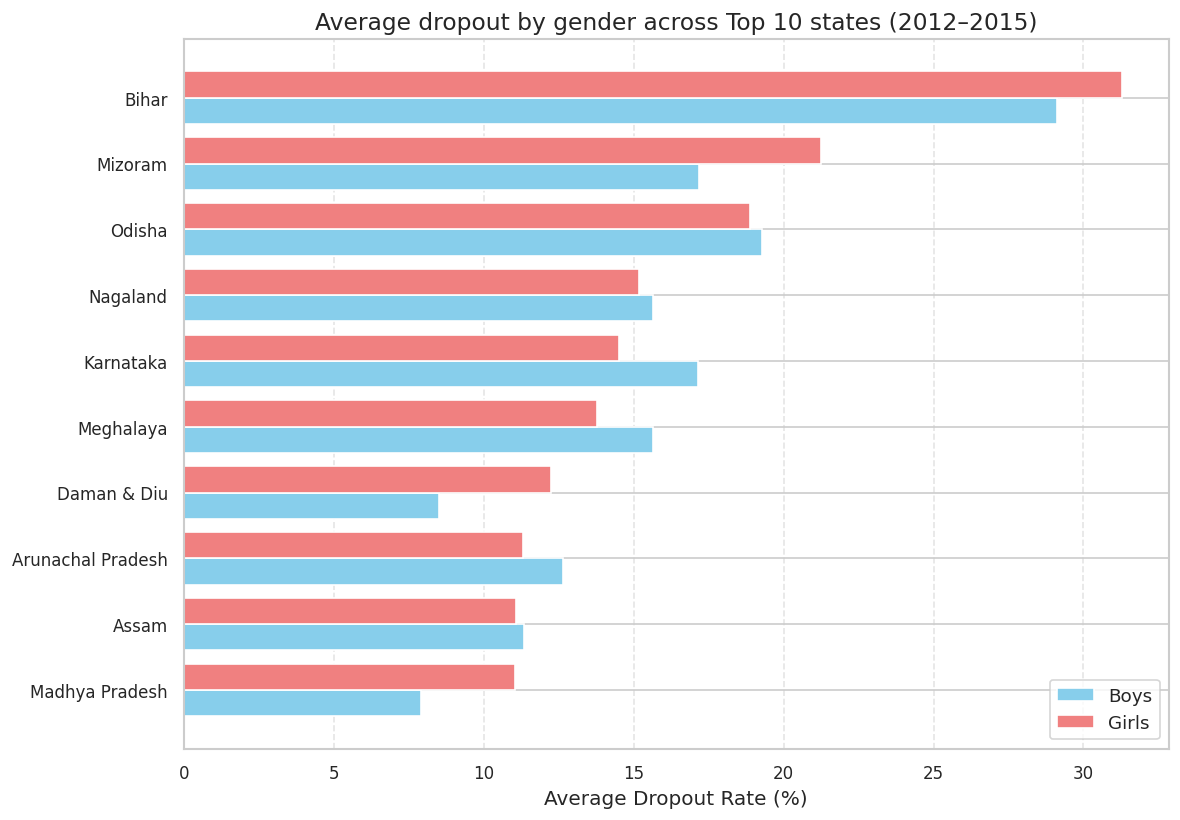

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute average dropout for each gender across all levels
df['Boys_Total'] = df[['Primary_Boys', 'Upper_Primary_Boys', 'Secondary__Boys', 'HrSecondary_Boys']].mean(axis=1)
df['Girls_Total'] = df[['Primary_Girls', 'Upper_Primary_Girls', 'Secondary__Girls', 'HrSecondary_Girls']].mean(axis=1)

# Step 2: Group by state and calculate average per gender
gender_avg = df.groupby('State_UT')[['Boys_Total', 'Girls_Total']].mean().reset_index()

# Step 3: Sort and keep Top 10 based on Girls' dropout
top10 = gender_avg.sort_values('Girls_Total', ascending=False).head(10)
top10 = top10[::-1]  # For better visual layout

# Step 4: Plot
plt.figure(figsize=(10, 7))
bar_width = 0.4
index = range(len(top10))

# Step 5: Plot horizontal bars
plt.barh([i - bar_width/2 for i in index], top10['Boys_Total'], height=bar_width, color='skyblue', label='Boys')
plt.barh([i + bar_width/2 for i in index], top10['Girls_Total'], height=bar_width, color='lightcoral', label='Girls')

# Step 6: Labels & formatting
plt.yticks(index, top10['State_UT'])
plt.xlabel('Average Dropout Rate (%)')
plt.title('Average dropout by gender across Top 10 states (2012–2015)', fontsize=14)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**PURPOSE:** Gender comparison at a specific level (e.g., Secondary)
- Grouped Bar Chart

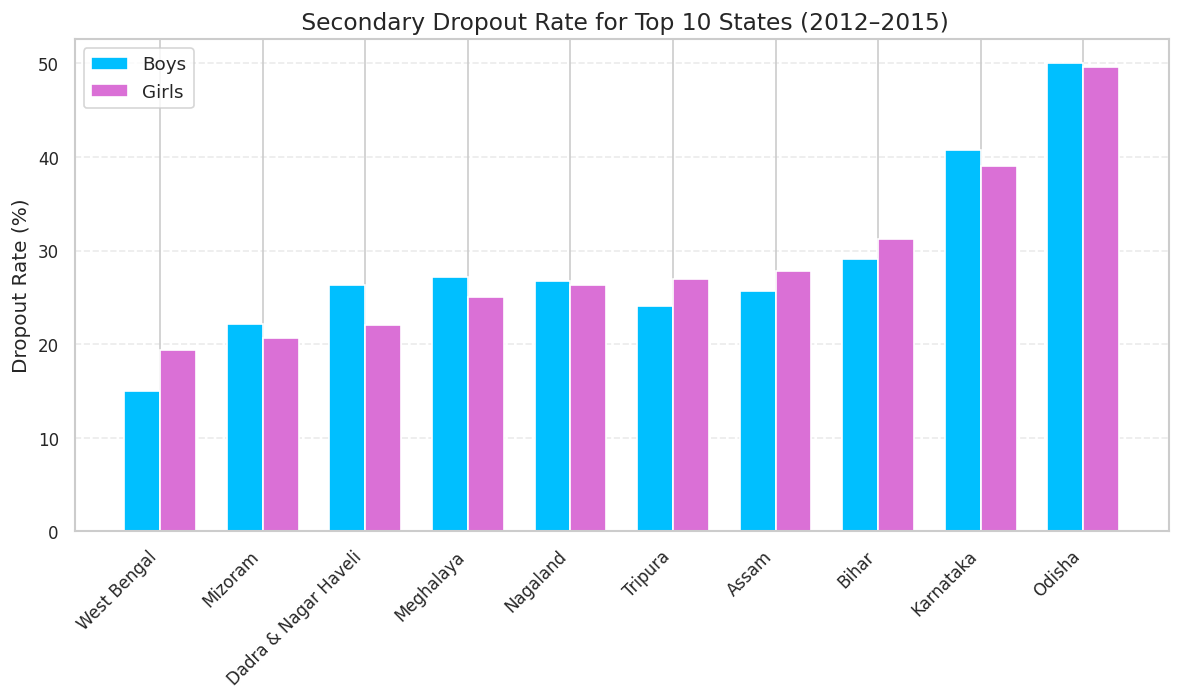

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract secondary level data
secondary_df = df[['State_UT', 'Secondary__Boys', 'Secondary__Girls']]
secondary_avg = secondary_df.groupby('State_UT').mean().reset_index()

# Step 2: Sort and select top 10 by Girls' dropout
top10_sec = secondary_avg.sort_values('Secondary__Girls', ascending=False).head(10)
top10_sec = top10_sec[::-1]  # Reverse for visual clarity

# Step 3: Plot
x = np.arange(len(top10_sec))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, top10_sec['Secondary__Boys'], width=bar_width, label='Boys', color='deepskyblue')
plt.bar(x + bar_width/2, top10_sec['Secondary__Girls'], width=bar_width, label='Girls', color='orchid')

plt.xticks(x, top10_sec['State_UT'], rotation=45, ha='right')
plt.ylabel('Dropout Rate (%)')
plt.title(' Secondary Dropout Rate for Top 10 States (2012–2015)', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

 **PURPOSE:** Clear visual of gender gap per state.
 - Dumbbell Chart

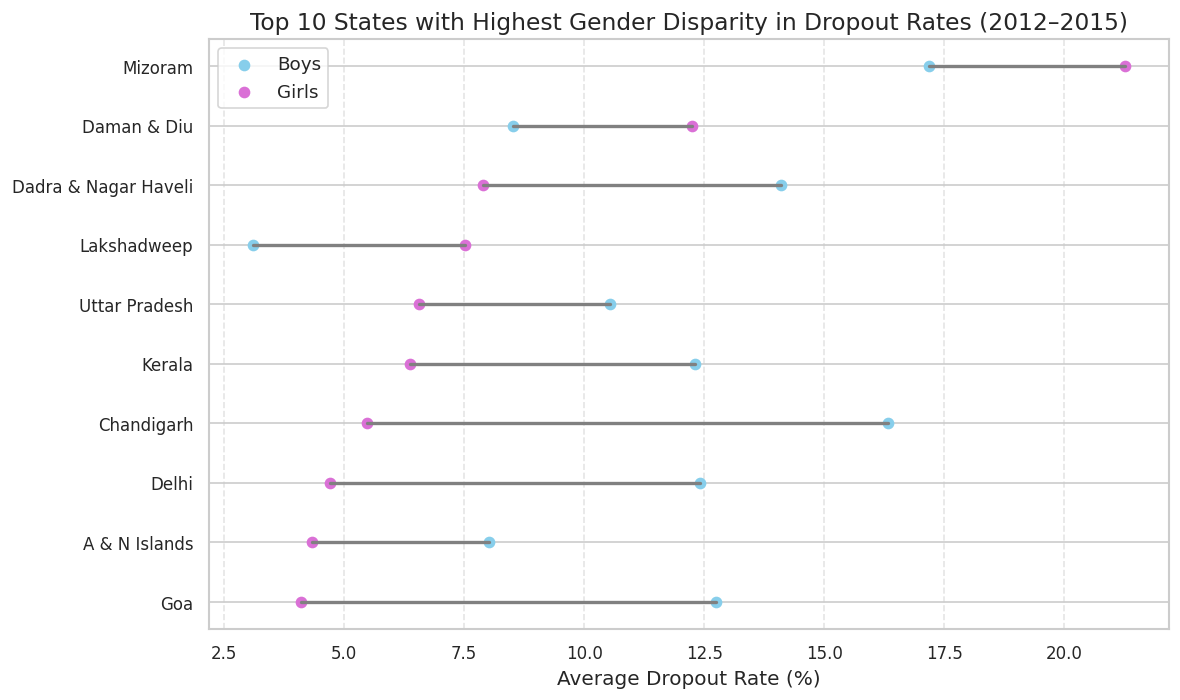

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Compute average dropout for boys & girls across levels
df['Boys_Total'] = df[['Primary_Boys', 'Upper_Primary_Boys', 'Secondary__Boys', 'HrSecondary_Boys']].mean(axis=1)
df['Girls_Total'] = df[['Primary_Girls', 'Upper_Primary_Girls', 'Secondary__Girls', 'HrSecondary_Girls']].mean(axis=1)

# Step 2: Group and average by state
gender_gap = df.groupby('State_UT')[['Boys_Total', 'Girls_Total']].mean().reset_index()

# Step 3: Calculate gap & select top 10 by absolute difference
gender_gap['Gap'] = abs(gender_gap['Girls_Total'] - gender_gap['Boys_Total'])
top10_gap = gender_gap.sort_values('Gap', ascending=False).head(10)
top10_gap = top10_gap.sort_values('Girls_Total')  # For better layout

# Step 4: Plot dumbbell chart
plt.figure(figsize=(10, 6))
for i, row in top10_gap.iterrows():
    plt.plot([row['Boys_Total'], row['Girls_Total']], [row['State_UT'], row['State_UT']],
             color='gray', linewidth=2)
    plt.scatter(row['Boys_Total'], row['State_UT'], color='skyblue', label='Boys' if i == top10_gap.index[0] else "")
    plt.scatter(row['Girls_Total'], row['State_UT'], color='orchid', label='Girls' if i == top10_gap.index[0] else "")

plt.xlabel('Average Dropout Rate (%)')
plt.title('Top 10 States with Highest Gender Disparity in Dropout Rates (2012–2015)', fontsize=14)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**PURPOSE:** Percentage distribution of dropout rates between boys and girls.
*   Pie Chart



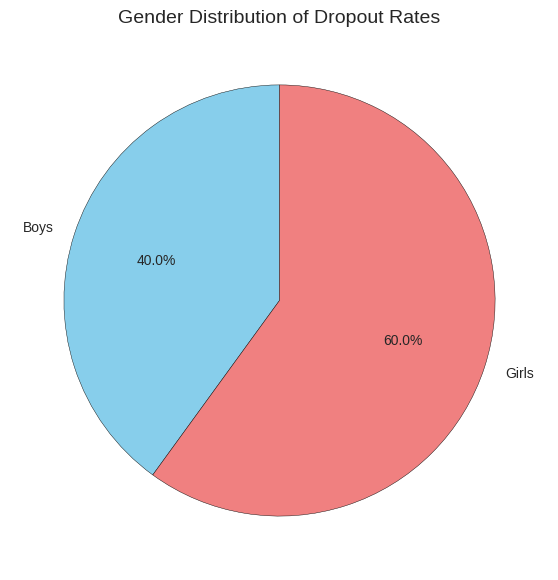

In [14]:
import matplotlib.pyplot as plt

# Sample Data: You can replace this with your actual dataset
labels = ['Boys', 'Girls']
sizes = [40, 60]  # Replace with your actual total dropout rates or proportions
colors = ['skyblue', 'lightcoral']

# Step 1: Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Step 2: Add title
plt.title('Gender Distribution of Dropout Rates', fontsize=14)

# Step 3: Show plot
plt.show()


# **TREND ANALYSIS**

**PROBLEM STATEMENT:** To analyze the dropout rates for boys and girls over the years 2012-2015.

**PURPOSE:** To display the dropout rates for boys and girls.
*   Line Chart




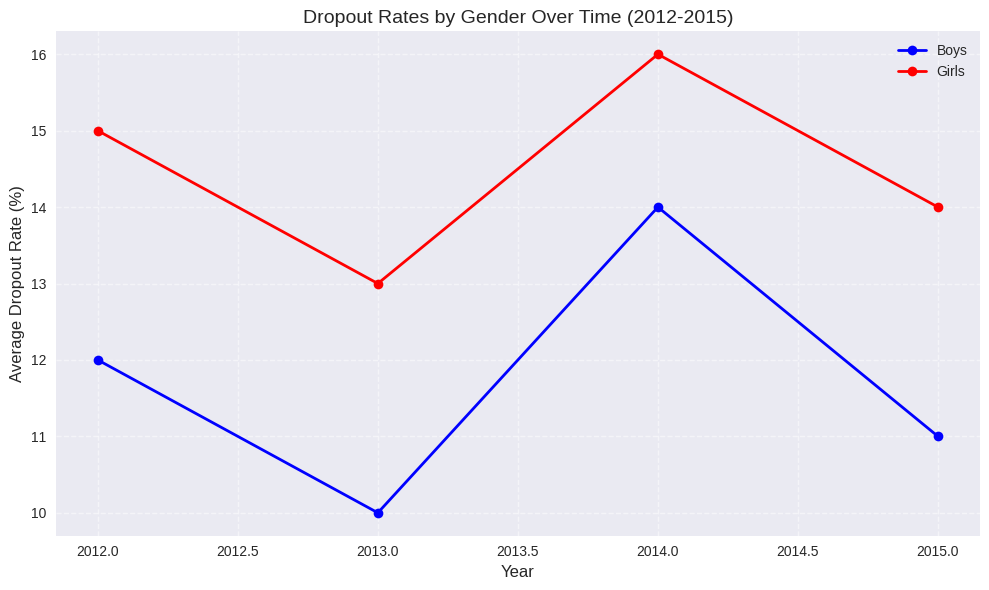

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data: You can replace this with your actual dataset
data = {
    'Year': [2012, 2013, 2014, 2015],
    'Boys_Total': [12, 10, 14, 11],
    'Girls_Total': [15, 13, 16, 14]
}

df = pd.DataFrame(data)

# Step 1: Set up the figure size
plt.figure(figsize=(10, 6))

# Step 2: Plot lines for Boys and Girls dropout rates over years
plt.plot(df['Year'], df['Boys_Total'], marker='o', label='Boys', color='blue', linestyle='-', linewidth=2)
plt.plot(df['Year'], df['Girls_Total'], marker='o', label='Girls', color='red', linestyle='-', linewidth=2)

# Step 3: Add titles and labels
plt.title('Dropout Rates by Gender Over Time (2012-2015)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Dropout Rate (%)', fontsize=12)
plt.legend()

# Step 4: Show plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **DROPOUT DISTRIBUTION**

**PROBLEM STATEMENT:** To Understand which education levels (Primary, Upper Primary, Secondary, Hr Secondary) have the highest dropout across all states.

**PURPOSE:** To analyze the distribution and density of dropout rates per level.

- Seaborn's Violin Plot

<ipython-input-19-53a37252c7b4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Level', y='Dropout Rate', data=df_long, palette='Set2')


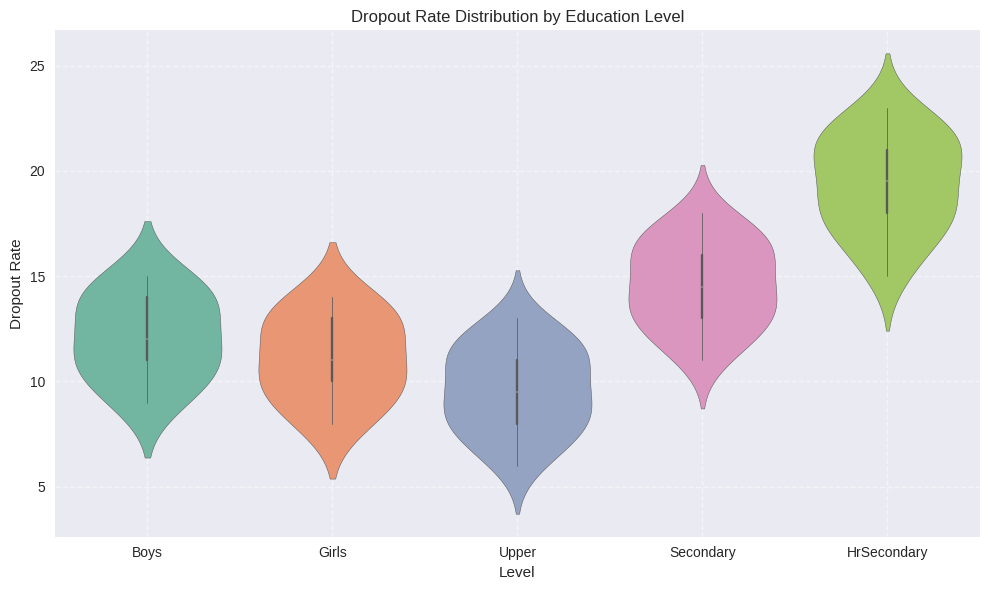

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dropout data per level (replace with your actual df)
df = pd.DataFrame({
    'Primary_Boys': [12, 14, 11, 13, 10, 9, 15, 11, 14],
    'Primary_Girls': [11, 13, 10, 12, 9, 8, 14, 10, 13],
    'Upper_Primary_Boys': [10, 12, 9, 11, 8, 7, 13, 9, 12],
    'Upper_Primary_Girls': [9, 11, 8, 10, 7, 6, 12, 8, 11],
    'Secondary__Boys': [15, 17, 14, 16, 13, 12, 18, 14, 17],
    'Secondary__Girls': [14, 16, 13, 15, 12, 11, 17, 13, 16],
    'HrSecondary_Boys': [20, 22, 19, 21, 18, 17, 23, 19, 22],
    'HrSecondary_Girls': [18, 21, 17, 20, 16, 15, 22, 18, 21],
})

# Reshape for plotting
df_long = df.melt(var_name='Level_Gender', value_name='Dropout Rate')
df_long['Level'] = df_long['Level_Gender'].apply(lambda x: x.replace('Primary_', '').replace('__', '_').split('_')[0])

# Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Level', y='Dropout Rate', data=df_long, palette='Set2')
plt.title('Dropout Rate Distribution by Education Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**PURPOSE:** To analyze the distribution and density of dropout rates per level.

- Line plot

Dropout Data for the Selected States:
                   Primary  Upper_Primary  Secondary  HrSecondary
Bihar                  5.2            6.5       10.1         12.3
Odisha                 6.5            4.1        8.5         10.2
Arunachal Pradesh      7.1            5.3        7.8         13.5
Mizoram                6.8            7.4       11.0         11.9
Jharkhand              4.2            5.7        9.2         12.5


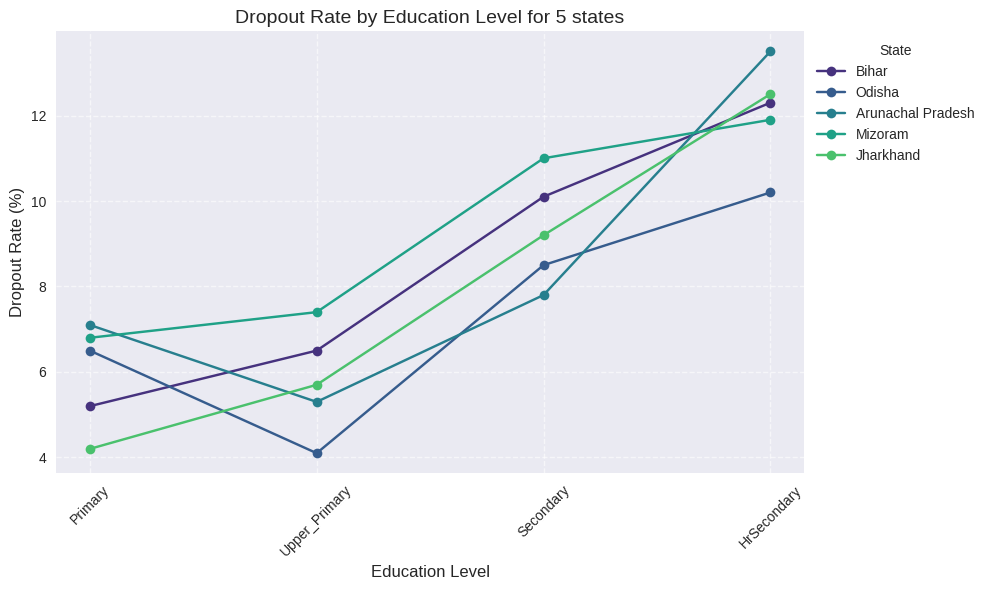

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dropout rate data for states and levels (replace with your actual data)
data = {
    'Primary': [5.2, 6.5, 7.1, 6.8, 4.2],
    'Upper_Primary': [6.5, 4.1, 5.3, 7.4, 5.7],
    'Secondary': [10.1, 8.5, 7.8, 11.0, 9.2],
    'HrSecondary': [12.3, 10.2, 13.5, 11.9, 12.5]
}

# State names
states = ['Bihar', 'Odisha', 'Arunachal Pradesh', 'Mizoram', 'Jharkhand']

# Convert data into a DataFrame
df = pd.DataFrame(data, index=states)

# Print the dropout data for the 5 states
print("Dropout Data for the Selected States:")
print(df)

# Plotting the dropout rate trends
plt.figure(figsize=(10, 6))

# Plot a line for each state across the education levels
for state in df.index:
    plt.plot(df.columns, df.loc[state], marker='o', label=state)

# Title and labels
plt.title('Dropout Rate by Education Level for 5 states', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Dropout Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Show legend
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))

# Tight layout for a better view
plt.tight_layout()

# Show the plot
plt.show()


# **REGIONAL ANALYSIS**

**PROBLEM STATEMENT:** To visualize the distribution of dropout rates across different education levels within each region

**PURPOSE:** To analyse dropout rates across different regions

- Box plot

<ipython-input-33-ed4fb611690f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Dropout Rate', data=df_box_melted, palette='Set2')


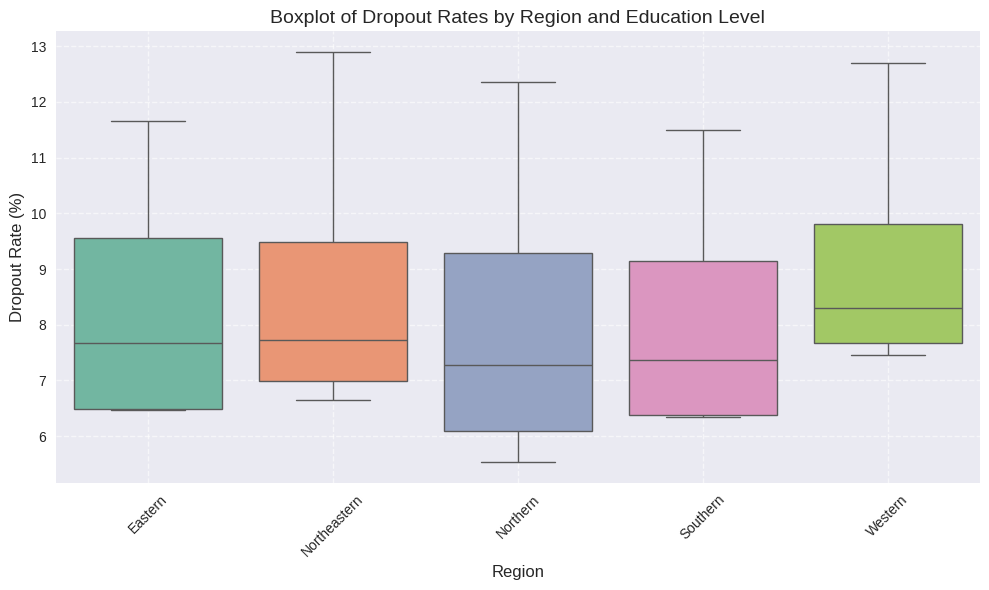

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for box plot
region_data = {
    'Eastern': [6.46, 6.50, 8.85, 11.65],
    'Northeastern': [7.10, 6.65, 8.35, 12.90],
    'Northern': [6.27, 5.53, 8.27, 12.35],
    'Southern': [6.35, 6.40, 8.35, 11.50],
    'Western': [7.75, 7.45, 8.85, 12.70]
}

# Convert data to a DataFrame for better handling
df_box = pd.DataFrame(region_data)

# Melt the DataFrame to long format
df_box_melted = df_box.melt(var_name='Region', value_name='Dropout Rate')

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Dropout Rate', data=df_box_melted, palette='Set2')

# Title and labels
plt.title('Boxplot of Dropout Rates by Region and Education Level', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Dropout Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


# **URGENCY ANALYSIS**

PROBLEM STATEMENT: To analyze which states and education levels have the highest dropout rates, signaling an urgent need for policy intervention

**PURPOSE:** To visually identify critical dropout hotspots across India for targeted educational reforms.
- Heatmap Visualization

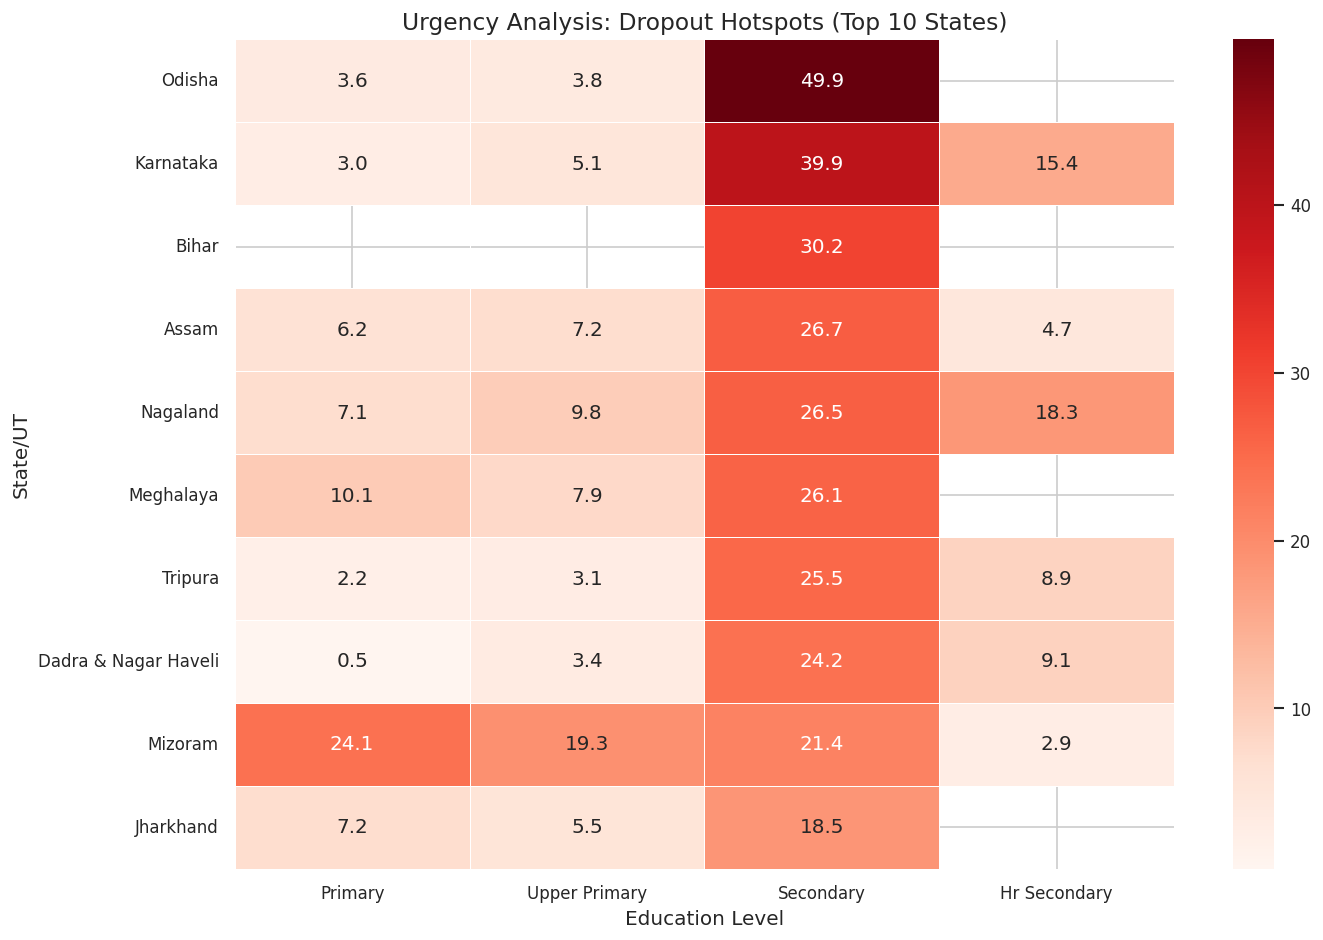

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute level-wise average dropout per state
df['Primary'] = df[['Primary_Boys', 'Primary_Girls']].mean(axis=1)
df['Upper Primary'] = df[['Upper_Primary_Boys', 'Upper_Primary_Girls']].mean(axis=1)
df['Secondary'] = df[['Secondary__Boys', 'Secondary__Girls']].mean(axis=1)
df['Hr Secondary'] = df[['HrSecondary_Boys', 'HrSecondary_Girls']].mean(axis=1)

# Group by state and get mean dropout for each level
heatmap_data = df.groupby('State_UT')[['Primary', 'Upper Primary', 'Secondary', 'Hr Secondary']].mean()

# Sort by max dropout across levels
heatmap_data = heatmap_data.loc[heatmap_data.max(axis=1).sort_values(ascending=False).index]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.head(10), annot=True, cmap="Reds", fmt=".1f", linewidths=0.5)
plt.title('Urgency Analysis: Dropout Hotspots (Top 10 States)', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

# **🎯 VISUALIZATION  OUTCOMES/SUMMARY**

**🔹 Gender Disparity:**

The charts clearly reveal that in many states, girls exhibit higher dropout rates than boys—especially at secondary and higher secondary levels. This highlights a pressing need for gender-sensitive policies, such as scholarships, safety measures, and awareness programs to retain girls in school.

 **🔹 Trend Analysis:**

The trend analysis of dropout rates over the years reveals key patterns in both male and female dropout rates. Boys generally show a decreasing dropout rate trend across all education levels, whereas girls show varying patterns, with spikes at certain points, especially in the secondary and higher secondary levels. This suggests that while boys may be retaining in school better, girls face higher challenges, especially as they progress through higher grades. This points to the need for more targeted interventions, particularly for girls at higher educational levels, to curb dropout rates.

**🔹 Dropout Distribution:**

The dropout distribution analysis indicates that the highest dropout rates are observed at the secondary and higher secondary education levels. These levels appear to be the most vulnerable, with both boys and girls showing significant dropout rates compared to primary and upper-primary levels. The data also suggests that dropouts are more concentrated in certain states and regions, further underscoring the need for policies that specifically target students in these crucial education stages to reduce dropouts.

**🔹 Regional Analysis:**

The regional analysis visualizes how dropout rates vary across different regions of India. It reveals that some regions, such as the Eastern and Northeastern parts of India, face higher dropout rates, especially in secondary and higher secondary education. In contrast, the Southern and Western regions show relatively lower dropout rates. This geographical disparity suggests that socio-economic, cultural, and infrastructural factors play a major role in influencing dropout rates, necessitating region-specific strategies for addressing these disparities in education access and quality.


**🔹 Urgency Analysis:**

States like Bihar, Arunachal Pradesh, and Madhya Pradesh emerge as dropout hotspots, particularly at the secondary level. These regions require immediate policy focus to address systemic issues such as infrastructure gaps, socio-economic barriers, and accessibility to quality education.

# **KEY FINDINGS**

**1. Gender Disparity:**

- Girls, especially at the secondary and higher secondary levels, tend to have
higher dropout rates compared to boys.

- This suggests that girls face more challenges in continuing their education as they progress through higher grades.

- Gender-sensitive interventions, such as scholarships, safe school environments, and awareness programs, are needed to retain girls in school.

**2. Trend Analysis:**

- Boys generally show a decreasing trend in dropout rates across all educational levels over the years.

- Girls’ dropout rates show varying trends, with notable spikes at the secondary and higher secondary levels, indicating a need for targeted interventions for girls at these stages.

- The trend highlights that efforts should focus on keeping girls in school, particularly at higher levels of education.

**3. Educational Distributions:**

- The highest dropout rates are observed at the secondary and higher secondary levels for both boys and girls.

- Primary and upper-primary levels show comparatively lower dropout rates, indicating that the most vulnerable stages are during the transition to higher levels of education.

- More focus is needed on ensuring that students progress through secondary education and beyond.

**4. Regional Disparities:**

- The Eastern and Northeastern regions, including states like Bihar, Arunachal Pradesh, and Mizoram, show significantly higher dropout rates.

- States like Kerala, Maharashtra, and Tamil Nadu, on the other hand, show lower dropout rates, indicating regional disparities in educational access and quality.

- Regional factors, including socio-economic conditions, infrastructure, and cultural norms, influence dropout rates, necessitating region-specific interventions.

# **CONCLUSION**

This analysis of school dropout data from 2012–2015 offers valuable insights into the educational landscape across Indian states. The study highlights:

**1. Gender Disparity:**

- A consistent gender disparity, with girls facing higher dropout rates, especially at secondary and higher secondary levels.

**2. Trend Analysis**

-  Several states with alarming dropout trends, such as Bihar, Arunachal Pradesh, and Madhya Pradesh, requiring urgent policy interventions.

**3. Socio-Economic:**

- A need for targeted efforts focusing on retention strategies, especially for girls, including infrastructure improvements, financial support, and awareness campaigns.

**4. Targeted Gender-Sensitive Policies:**

- There is an urgent need for gender-sensitive interventions to support girls, particularly at higher education levels, to combat dropout rates. Policies focusing on scholarships, school safety, and awareness programs are critical for retaining girls in education.

-  Focus on Secondary and Higher Secondary Levels:

- The secondary and higher secondary levels exhibit the highest dropout rates. These levels need focused efforts, including infrastructure improvements, mentorship programs, and academic support, to reduce dropout rates.

**5. Regional Interventions:**

- States and regions with higher dropout rates require urgent policy focus. States like Bihar, Arunachal Pradesh, and others in the Eastern and Northeastern regions need tailored interventions to address the unique challenges they face, such as socio-economic barriers and lack of educational infrastructure.

- Continued Monitoring and Trend Analysis:

- Regular monitoring of dropout trends over the years will help in assessing the effectiveness of interventions and identifying new areas of concern. This can guide the formulation of future educational policies and programs.

**6. Policy Recommendations:**

- Regional, gender-sensitive, and level-specific interventions, combined with regular monitoring, are key to reducing dropout rates and ensuring that all students have access to quality education throughout their academic journey.

Overall, this project serves as a data-driven foundation for policymakers, educators, and NGOs to design localized and inclusive strategies to reduce dropout rates and improve the quality of education across India.

# **REFERENCES**

1. Unified District Information System for Education (U-DISE)
Government of India, Ministry of Education
https://udiseplus.gov.in

2. National Sample Survey Office (NSSO) Reports
Ministry of Statistics and Programme Implementation
https://mospi.gov.in

3. All India Survey on Higher Education (AISHE)
Ministry of Education, Government of India
https://aishe.gov.in

4. Annual Reports – Ministry of Education
https://education.gov.in/en/statistics-new

5. Articles and Research Journals on Dropout Trends in India

6. Indian Journal of Educational Technology

7. Economic and Political Weekly (EPW)

8. ResearchGate & Google Scholar

  Data Visualization Libraries Used

  Matplotlib: https://matplotlib.org

  Seaborn: https://seaborn.pydata.org

  Pandas: https://pandas.pydata.org